## ML Project : Diabetes Prediction Using Random Forest Classifier

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Data Gathering

In [2]:
df = pd.read_csv('C:/Users/Ranesh/OneDrive/Desktop/Machine Learning/healthcare_diabetes_prediction-main/healthcare_diabetes_prediction-main/Diabetes.csv')
df.head(10)

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
5,6,5,116,74,0,0,25.6,0.201,30,0
6,7,3,78,50,32,88,31.0,0.248,26,1
7,8,10,115,0,0,0,35.3,0.134,29,0
8,9,2,197,70,45,543,30.5,0.158,53,1
9,10,8,125,96,0,0,0.0,0.232,54,1


### Step 2:EDA - Read and explore the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [4]:
df.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [5]:
df.isnull().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df['Outcome'].value_counts()

0    1816
1     952
Name: Outcome, dtype: int64

#### Visualizing numerical variables

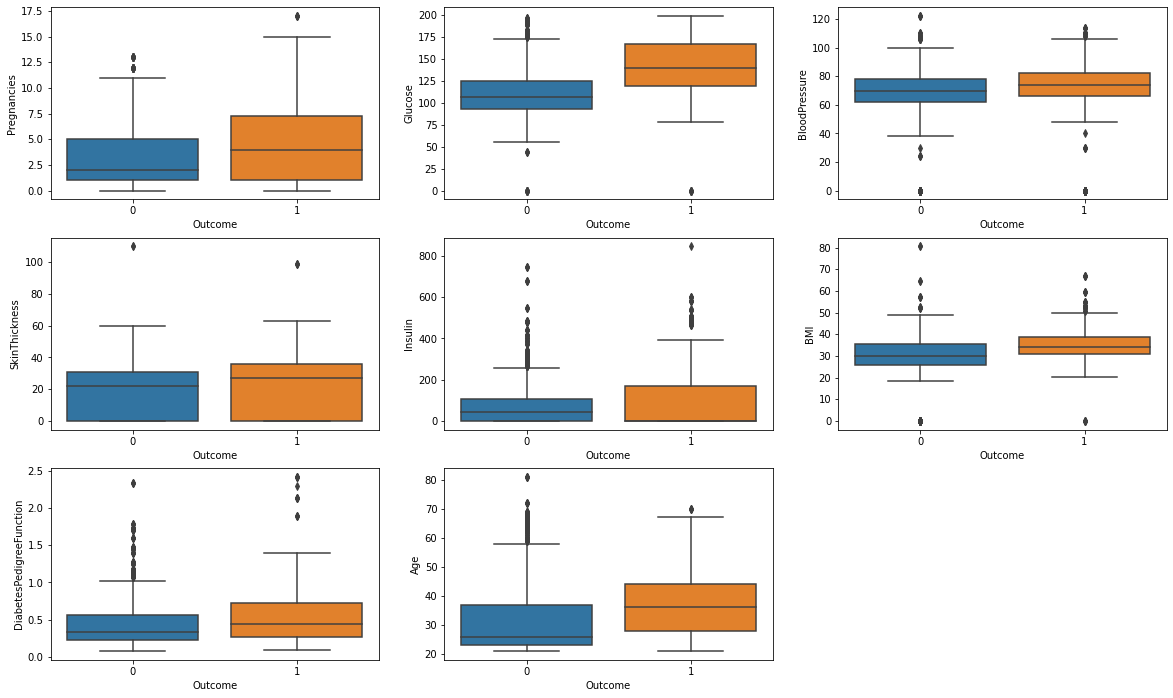

In [7]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'Outcome', y = 'Pregnancies', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'Outcome', y = 'Glucose', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'Outcome', y = 'BloodPressure', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'Outcome', y = 'SkinThickness', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'Outcome', y = 'Insulin', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'Outcome', y = 'BMI', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'Outcome', y = 'DiabetesPedigreeFunction', data = df)
plt.subplot(3,3,8)
sns.boxplot(x = 'Outcome', y = 'Age', data = df)
plt.show()

### Step 3: Train Test split the data

In [8]:
def train_test_split_and_features(df):
    y = df["Outcome"]
    x = df.drop(['Outcome','Id'],axis=1)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 0)
    print(x.head(5))
    print(x.columns)
    features = list(x.columns)
    return x_train, x_test, y_train, y_test,features

In [9]:
x_train, x_test, y_train, y_test,features = train_test_split_and_features(df)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


Random forest classifiers have proven effective in predicting diabetes by analyzing various factors such as patient demographics, medical history, and biomarkers. By leveraging the ensemble learning technique and combining multiple decision trees, random forest models can provide accurate predictions of diabetic risk, aiding in early detection and personalized treatment strategies.

### Step 4: Fit and evaluate model

In [10]:
def fit_and_evaluate_model(x_train, x_test, y_train, y_test,max_depth=5,min_samples_split=0.01,max_features=0.8,max_samples=0.8):
    random_forest =  RandomForestClassifier(random_state=0,\
                                            max_depth=max_depth,\
                                            min_samples_split=min_samples_split,\
                                            max_features=max_features,
                                            max_samples=max_samples)

    model = random_forest.fit(x_train, y_train)
    random_forest_predict = random_forest.predict(x_test)
    random_forest_conf_matrix = confusion_matrix(y_test, random_forest_predict)
    random_forest_acc_score = accuracy_score(y_test, random_forest_predict)
    print("confussion matrix")
    print(random_forest_conf_matrix)
    print("\n")
    print("Accuracy of Random Forest:",random_forest_acc_score*100,'\n')
    print(classification_report(y_test,random_forest_predict))
    return model

In [11]:
model = fit_and_evaluate_model(x_train, x_test, y_train, y_test)

confussion matrix
[[326  48]
 [ 36 144]]


Accuracy of Random Forest: 84.83754512635379 

              precision    recall  f1-score   support

           0       0.90      0.87      0.89       374
           1       0.75      0.80      0.77       180

    accuracy                           0.85       554
   macro avg       0.83      0.84      0.83       554
weighted avg       0.85      0.85      0.85       554



### Step 5: Try different parameters to identify best ones

In [12]:
param_grid = [
  {'max_depth': [3,5,7,10], 'min_samples_split': [0.01,0.03, 0.07, 0.1], 
'max_features': [0.7,0.8,0.9,1.0],
'max_samples': [0.7,0.8,0.9,1.0]}]

In [13]:
model = RandomForestClassifier()
search = GridSearchCV(estimator = model, param_grid = param_grid, cv=5, verbose=5)
search.fit(x_train, y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV] max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.01 
[CV]  max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.01, score=0.756, total=   0.2s
[CV] max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.01 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.01, score=0.790, total=   0.2s
[CV] max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.01 
[CV]  max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.01, score=0.763, total=   0.2s
[CV] max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.01 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s


[CV]  max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.01, score=0.772, total=   0.2s
[CV] max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.01 
[CV]  max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.01, score=0.785, total=   0.2s
[CV] max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.03 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s


[CV]  max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.03, score=0.756, total=   0.1s
[CV] max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.03 
[CV]  max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.03, score=0.788, total=   0.2s
[CV] max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.03 
[CV]  max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.03, score=0.765, total=   0.2s
[CV] max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.03 
[CV]  max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.03, score=0.779, total=   0.2s
[CV] max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.03 
[CV]  max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.03, score=0.781, total=   0.2s
[CV] max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.07 
[CV]  max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.07, score=0.743,

[CV]  max_depth=3, max_features=0.7, max_samples=0.9, min_samples_split=0.07, score=0.783, total=   0.2s
[CV] max_depth=3, max_features=0.7, max_samples=0.9, min_samples_split=0.07 
[CV]  max_depth=3, max_features=0.7, max_samples=0.9, min_samples_split=0.07, score=0.761, total=   0.2s
[CV] max_depth=3, max_features=0.7, max_samples=0.9, min_samples_split=0.07 
[CV]  max_depth=3, max_features=0.7, max_samples=0.9, min_samples_split=0.07, score=0.781, total=   0.2s
[CV] max_depth=3, max_features=0.7, max_samples=0.9, min_samples_split=0.07 
[CV]  max_depth=3, max_features=0.7, max_samples=0.9, min_samples_split=0.07, score=0.785, total=   0.2s
[CV] max_depth=3, max_features=0.7, max_samples=0.9, min_samples_split=0.1 
[CV]  max_depth=3, max_features=0.7, max_samples=0.9, min_samples_split=0.1, score=0.761, total=   0.2s
[CV] max_depth=3, max_features=0.7, max_samples=0.9, min_samples_split=0.1 
[CV]  max_depth=3, max_features=0.7, max_samples=0.9, min_samples_split=0.1, score=0.774, tot

C:\Users\Public\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Public\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Public\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\Public\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Public\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit f

[CV]  max_depth=3, max_features=0.8, max_samples=0.7, min_samples_split=0.01, score=0.765, total=   0.2s
[CV] max_depth=3, max_features=0.8, max_samples=0.7, min_samples_split=0.01 
[CV]  max_depth=3, max_features=0.8, max_samples=0.7, min_samples_split=0.01, score=0.779, total=   0.1s
[CV] max_depth=3, max_features=0.8, max_samples=0.7, min_samples_split=0.01 
[CV]  max_depth=3, max_features=0.8, max_samples=0.7, min_samples_split=0.01, score=0.761, total=   0.2s
[CV] max_depth=3, max_features=0.8, max_samples=0.7, min_samples_split=0.01 
[CV]  max_depth=3, max_features=0.8, max_samples=0.7, min_samples_split=0.01, score=0.761, total=   0.2s
[CV] max_depth=3, max_features=0.8, max_samples=0.7, min_samples_split=0.01 
[CV]  max_depth=3, max_features=0.8, max_samples=0.7, min_samples_split=0.01, score=0.787, total=   0.2s
[CV] max_depth=3, max_features=0.8, max_samples=0.7, min_samples_split=0.03 
[CV]  max_depth=3, max_features=0.8, max_samples=0.7, min_samples_split=0.03, score=0.752,

[CV]  max_depth=3, max_features=0.8, max_samples=0.9, min_samples_split=0.03, score=0.788, total=   0.2s
[CV] max_depth=3, max_features=0.8, max_samples=0.9, min_samples_split=0.03 
[CV]  max_depth=3, max_features=0.8, max_samples=0.9, min_samples_split=0.03, score=0.765, total=   0.2s
[CV] max_depth=3, max_features=0.8, max_samples=0.9, min_samples_split=0.03 
[CV]  max_depth=3, max_features=0.8, max_samples=0.9, min_samples_split=0.03, score=0.788, total=   0.2s
[CV] max_depth=3, max_features=0.8, max_samples=0.9, min_samples_split=0.03 
[CV]  max_depth=3, max_features=0.8, max_samples=0.9, min_samples_split=0.03, score=0.781, total=   0.2s
[CV] max_depth=3, max_features=0.8, max_samples=0.9, min_samples_split=0.07 
[CV]  max_depth=3, max_features=0.8, max_samples=0.9, min_samples_split=0.07, score=0.747, total=   0.2s
[CV] max_depth=3, max_features=0.8, max_samples=0.9, min_samples_split=0.07 
[CV]  max_depth=3, max_features=0.8, max_samples=0.9, min_samples_split=0.07, score=0.792,

C:\Users\Public\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Public\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Public\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\Public\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Public\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit f

[CV]  max_depth=3, max_features=0.8, max_samples=1.0, min_samples_split=0.01, score=nan, total=   0.0s
[CV] max_depth=3, max_features=0.8, max_samples=1.0, min_samples_split=0.03 
[CV]  max_depth=3, max_features=0.8, max_samples=1.0, min_samples_split=0.03, score=nan, total=   0.0s
[CV] max_depth=3, max_features=0.8, max_samples=1.0, min_samples_split=0.03 
[CV]  max_depth=3, max_features=0.8, max_samples=1.0, min_samples_split=0.03, score=nan, total=   0.0s
[CV] max_depth=3, max_features=0.8, max_samples=1.0, min_samples_split=0.03 
[CV]  max_depth=3, max_features=0.8, max_samples=1.0, min_samples_split=0.03, score=nan, total=   0.0s
[CV] max_depth=3, max_features=0.8, max_samples=1.0, min_samples_split=0.03 
[CV]  max_depth=3, max_features=0.8, max_samples=1.0, min_samples_split=0.03, score=nan, total=   0.0s
[CV] max_depth=3, max_features=0.8, max_samples=1.0, min_samples_split=0.03 
[CV]  max_depth=3, max_features=0.8, max_samples=1.0, min_samples_split=0.03, score=nan, total=   0.

[CV]  max_depth=3, max_features=0.9, max_samples=0.8, min_samples_split=0.07, score=0.747, total=   0.2s
[CV] max_depth=3, max_features=0.9, max_samples=0.8, min_samples_split=0.07 
[CV]  max_depth=3, max_features=0.9, max_samples=0.8, min_samples_split=0.07, score=0.774, total=   0.2s
[CV] max_depth=3, max_features=0.9, max_samples=0.8, min_samples_split=0.07 
[CV]  max_depth=3, max_features=0.9, max_samples=0.8, min_samples_split=0.07, score=0.756, total=   0.2s
[CV] max_depth=3, max_features=0.9, max_samples=0.8, min_samples_split=0.07 
[CV]  max_depth=3, max_features=0.9, max_samples=0.8, min_samples_split=0.07, score=0.781, total=   0.2s
[CV] max_depth=3, max_features=0.9, max_samples=0.8, min_samples_split=0.07 
[CV]  max_depth=3, max_features=0.9, max_samples=0.8, min_samples_split=0.07, score=0.794, total=   0.2s
[CV] max_depth=3, max_features=0.9, max_samples=0.8, min_samples_split=0.1 
[CV]  max_depth=3, max_features=0.9, max_samples=0.8, min_samples_split=0.1, score=0.745, t

C:\Users\Public\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Public\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Public\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\Public\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Public\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit f

[CV]  max_depth=3, max_features=0.9, max_samples=1.0, min_samples_split=0.03, score=nan, total=   0.0s
[CV] max_depth=3, max_features=0.9, max_samples=1.0, min_samples_split=0.03 
[CV]  max_depth=3, max_features=0.9, max_samples=1.0, min_samples_split=0.03, score=nan, total=   0.0s
[CV] max_depth=3, max_features=0.9, max_samples=1.0, min_samples_split=0.03 
[CV]  max_depth=3, max_features=0.9, max_samples=1.0, min_samples_split=0.03, score=nan, total=   0.0s
[CV] max_depth=3, max_features=0.9, max_samples=1.0, min_samples_split=0.03 
[CV]  max_depth=3, max_features=0.9, max_samples=1.0, min_samples_split=0.03, score=nan, total=   0.0s
[CV] max_depth=3, max_features=0.9, max_samples=1.0, min_samples_split=0.07 
[CV]  max_depth=3, max_features=0.9, max_samples=1.0, min_samples_split=0.07, score=nan, total=   0.0s
[CV] max_depth=3, max_features=0.9, max_samples=1.0, min_samples_split=0.07 
[CV]  max_depth=3, max_features=0.9, max_samples=1.0, min_samples_split=0.07, score=nan, total=   0.

[CV]  max_depth=3, max_features=1.0, max_samples=0.8, min_samples_split=0.07, score=0.740, total=   0.2s
[CV] max_depth=3, max_features=1.0, max_samples=0.8, min_samples_split=0.07 
[CV]  max_depth=3, max_features=1.0, max_samples=0.8, min_samples_split=0.07, score=0.792, total=   0.2s
[CV] max_depth=3, max_features=1.0, max_samples=0.8, min_samples_split=0.1 
[CV]  max_depth=3, max_features=1.0, max_samples=0.8, min_samples_split=0.1, score=0.752, total=   0.2s
[CV] max_depth=3, max_features=1.0, max_samples=0.8, min_samples_split=0.1 
[CV]  max_depth=3, max_features=1.0, max_samples=0.8, min_samples_split=0.1, score=0.777, total=   0.2s
[CV] max_depth=3, max_features=1.0, max_samples=0.8, min_samples_split=0.1 
[CV]  max_depth=3, max_features=1.0, max_samples=0.8, min_samples_split=0.1, score=0.758, total=   0.2s
[CV] max_depth=3, max_features=1.0, max_samples=0.8, min_samples_split=0.1 
[CV]  max_depth=3, max_features=1.0, max_samples=0.8, min_samples_split=0.1, score=0.754, total= 

C:\Users\Public\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Public\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Public\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\Public\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Public\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit f

[CV]  max_depth=5, max_features=0.7, max_samples=0.7, min_samples_split=0.01, score=0.822, total=   0.2s
[CV] max_depth=5, max_features=0.7, max_samples=0.7, min_samples_split=0.01 
[CV]  max_depth=5, max_features=0.7, max_samples=0.7, min_samples_split=0.01, score=0.842, total=   0.2s
[CV] max_depth=5, max_features=0.7, max_samples=0.7, min_samples_split=0.01 
[CV]  max_depth=5, max_features=0.7, max_samples=0.7, min_samples_split=0.01, score=0.806, total=   0.2s
[CV] max_depth=5, max_features=0.7, max_samples=0.7, min_samples_split=0.01 
[CV]  max_depth=5, max_features=0.7, max_samples=0.7, min_samples_split=0.01, score=0.819, total=   0.2s
[CV] max_depth=5, max_features=0.7, max_samples=0.7, min_samples_split=0.01 
[CV]  max_depth=5, max_features=0.7, max_samples=0.7, min_samples_split=0.01, score=0.819, total=   0.2s
[CV] max_depth=5, max_features=0.7, max_samples=0.7, min_samples_split=0.03 
[CV]  max_depth=5, max_features=0.7, max_samples=0.7, min_samples_split=0.03, score=0.810,

[CV]  max_depth=5, max_features=0.7, max_samples=0.9, min_samples_split=0.03, score=0.853, total=   0.2s
[CV] max_depth=5, max_features=0.7, max_samples=0.9, min_samples_split=0.03 
[CV]  max_depth=5, max_features=0.7, max_samples=0.9, min_samples_split=0.03, score=0.806, total=   0.2s
[CV] max_depth=5, max_features=0.7, max_samples=0.9, min_samples_split=0.03 
[CV]  max_depth=5, max_features=0.7, max_samples=0.9, min_samples_split=0.03, score=0.806, total=   0.2s
[CV] max_depth=5, max_features=0.7, max_samples=0.9, min_samples_split=0.03 
[CV]  max_depth=5, max_features=0.7, max_samples=0.9, min_samples_split=0.03, score=0.814, total=   0.2s
[CV] max_depth=5, max_features=0.7, max_samples=0.9, min_samples_split=0.07 
[CV]  max_depth=5, max_features=0.7, max_samples=0.9, min_samples_split=0.07, score=0.772, total=   0.2s
[CV] max_depth=5, max_features=0.7, max_samples=0.9, min_samples_split=0.07 
[CV]  max_depth=5, max_features=0.7, max_samples=0.9, min_samples_split=0.07, score=0.835,

C:\Users\Public\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Public\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Public\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\Public\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Public\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit f

[CV]  max_depth=5, max_features=0.8, max_samples=0.7, min_samples_split=0.01, score=0.808, total=   0.2s
[CV] max_depth=5, max_features=0.8, max_samples=0.7, min_samples_split=0.01 
[CV]  max_depth=5, max_features=0.8, max_samples=0.7, min_samples_split=0.01, score=0.858, total=   0.2s
[CV] max_depth=5, max_features=0.8, max_samples=0.7, min_samples_split=0.01 
[CV]  max_depth=5, max_features=0.8, max_samples=0.7, min_samples_split=0.01, score=0.813, total=   0.2s
[CV] max_depth=5, max_features=0.8, max_samples=0.7, min_samples_split=0.01 
[CV]  max_depth=5, max_features=0.8, max_samples=0.7, min_samples_split=0.01, score=0.822, total=   0.2s
[CV] max_depth=5, max_features=0.8, max_samples=0.7, min_samples_split=0.01 
[CV]  max_depth=5, max_features=0.8, max_samples=0.7, min_samples_split=0.01, score=0.824, total=   0.2s
[CV] max_depth=5, max_features=0.8, max_samples=0.7, min_samples_split=0.03 
[CV]  max_depth=5, max_features=0.8, max_samples=0.7, min_samples_split=0.03, score=0.815,

[CV]  max_depth=5, max_features=0.8, max_samples=0.9, min_samples_split=0.03, score=0.847, total=   0.2s
[CV] max_depth=5, max_features=0.8, max_samples=0.9, min_samples_split=0.03 
[CV]  max_depth=5, max_features=0.8, max_samples=0.9, min_samples_split=0.03, score=0.815, total=   0.2s
[CV] max_depth=5, max_features=0.8, max_samples=0.9, min_samples_split=0.03 
[CV]  max_depth=5, max_features=0.8, max_samples=0.9, min_samples_split=0.03, score=0.831, total=   0.2s
[CV] max_depth=5, max_features=0.8, max_samples=0.9, min_samples_split=0.03 
[CV]  max_depth=5, max_features=0.8, max_samples=0.9, min_samples_split=0.03, score=0.803, total=   0.2s
[CV] max_depth=5, max_features=0.8, max_samples=0.9, min_samples_split=0.07 
[CV]  max_depth=5, max_features=0.8, max_samples=0.9, min_samples_split=0.07, score=0.772, total=   0.2s
[CV] max_depth=5, max_features=0.8, max_samples=0.9, min_samples_split=0.07 
[CV]  max_depth=5, max_features=0.8, max_samples=0.9, min_samples_split=0.07, score=0.837,

C:\Users\Public\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Public\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Public\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\Public\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Public\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit f

[CV]  max_depth=5, max_features=0.9, max_samples=0.7, min_samples_split=0.01, score=0.828, total=   0.2s
[CV] max_depth=5, max_features=0.9, max_samples=0.7, min_samples_split=0.01 
[CV]  max_depth=5, max_features=0.9, max_samples=0.7, min_samples_split=0.01, score=0.869, total=   0.2s
[CV] max_depth=5, max_features=0.9, max_samples=0.7, min_samples_split=0.01 
[CV]  max_depth=5, max_features=0.9, max_samples=0.7, min_samples_split=0.01, score=0.806, total=   0.2s
[CV] max_depth=5, max_features=0.9, max_samples=0.7, min_samples_split=0.01 
[CV]  max_depth=5, max_features=0.9, max_samples=0.7, min_samples_split=0.01, score=0.833, total=   0.2s
[CV] max_depth=5, max_features=0.9, max_samples=0.7, min_samples_split=0.01 
[CV]  max_depth=5, max_features=0.9, max_samples=0.7, min_samples_split=0.01, score=0.814, total=   0.2s
[CV] max_depth=5, max_features=0.9, max_samples=0.7, min_samples_split=0.03 
[CV]  max_depth=5, max_features=0.9, max_samples=0.7, min_samples_split=0.03, score=0.801,

[CV]  max_depth=5, max_features=0.9, max_samples=0.9, min_samples_split=0.03, score=0.853, total=   0.2s
[CV] max_depth=5, max_features=0.9, max_samples=0.9, min_samples_split=0.03 
[CV]  max_depth=5, max_features=0.9, max_samples=0.9, min_samples_split=0.03, score=0.815, total=   0.2s
[CV] max_depth=5, max_features=0.9, max_samples=0.9, min_samples_split=0.03 
[CV]  max_depth=5, max_features=0.9, max_samples=0.9, min_samples_split=0.03, score=0.817, total=   0.2s
[CV] max_depth=5, max_features=0.9, max_samples=0.9, min_samples_split=0.03 
[CV]  max_depth=5, max_features=0.9, max_samples=0.9, min_samples_split=0.03, score=0.810, total=   0.2s
[CV] max_depth=5, max_features=0.9, max_samples=0.9, min_samples_split=0.07 
[CV]  max_depth=5, max_features=0.9, max_samples=0.9, min_samples_split=0.07, score=0.767, total=   0.2s
[CV] max_depth=5, max_features=0.9, max_samples=0.9, min_samples_split=0.07 
[CV]  max_depth=5, max_features=0.9, max_samples=0.9, min_samples_split=0.07, score=0.842,

C:\Users\Public\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Public\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Public\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\Public\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Public\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit f

[CV]  max_depth=5, max_features=0.9, max_samples=1.0, min_samples_split=0.01, score=nan, total=   0.0s
[CV] max_depth=5, max_features=0.9, max_samples=1.0, min_samples_split=0.01 
[CV]  max_depth=5, max_features=0.9, max_samples=1.0, min_samples_split=0.01, score=nan, total=   0.0s
[CV] max_depth=5, max_features=0.9, max_samples=1.0, min_samples_split=0.01 
[CV]  max_depth=5, max_features=0.9, max_samples=1.0, min_samples_split=0.01, score=nan, total=   0.0s
[CV] max_depth=5, max_features=0.9, max_samples=1.0, min_samples_split=0.01 
[CV]  max_depth=5, max_features=0.9, max_samples=1.0, min_samples_split=0.01, score=nan, total=   0.0s
[CV] max_depth=5, max_features=0.9, max_samples=1.0, min_samples_split=0.01 
[CV]  max_depth=5, max_features=0.9, max_samples=1.0, min_samples_split=0.01, score=nan, total=   0.0s
[CV] max_depth=5, max_features=0.9, max_samples=1.0, min_samples_split=0.03 
[CV]  max_depth=5, max_features=0.9, max_samples=1.0, min_samples_split=0.03, score=nan, total=   0.

[CV]  max_depth=5, max_features=1.0, max_samples=0.8, min_samples_split=0.03, score=0.865, total=   0.2s
[CV] max_depth=5, max_features=1.0, max_samples=0.8, min_samples_split=0.03 
[CV]  max_depth=5, max_features=1.0, max_samples=0.8, min_samples_split=0.03, score=0.819, total=   0.2s
[CV] max_depth=5, max_features=1.0, max_samples=0.8, min_samples_split=0.03 
[CV]  max_depth=5, max_features=1.0, max_samples=0.8, min_samples_split=0.03, score=0.824, total=   0.2s
[CV] max_depth=5, max_features=1.0, max_samples=0.8, min_samples_split=0.03 
[CV]  max_depth=5, max_features=1.0, max_samples=0.8, min_samples_split=0.03, score=0.810, total=   0.2s
[CV] max_depth=5, max_features=1.0, max_samples=0.8, min_samples_split=0.07 
[CV]  max_depth=5, max_features=1.0, max_samples=0.8, min_samples_split=0.07, score=0.777, total=   0.2s
[CV] max_depth=5, max_features=1.0, max_samples=0.8, min_samples_split=0.07 
[CV]  max_depth=5, max_features=1.0, max_samples=0.8, min_samples_split=0.07, score=0.833,

C:\Users\Public\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Public\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Public\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\Public\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Public\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit f

[CV]  max_depth=7, max_features=0.7, max_samples=0.7, min_samples_split=0.01, score=0.856, total=   0.2s
[CV] max_depth=7, max_features=0.7, max_samples=0.7, min_samples_split=0.01 
[CV]  max_depth=7, max_features=0.7, max_samples=0.7, min_samples_split=0.01, score=0.919, total=   0.2s
[CV] max_depth=7, max_features=0.7, max_samples=0.7, min_samples_split=0.01 
[CV]  max_depth=7, max_features=0.7, max_samples=0.7, min_samples_split=0.01, score=0.849, total=   0.2s
[CV] max_depth=7, max_features=0.7, max_samples=0.7, min_samples_split=0.01 
[CV]  max_depth=7, max_features=0.7, max_samples=0.7, min_samples_split=0.01, score=0.876, total=   0.2s
[CV] max_depth=7, max_features=0.7, max_samples=0.7, min_samples_split=0.01 
[CV]  max_depth=7, max_features=0.7, max_samples=0.7, min_samples_split=0.01, score=0.873, total=   0.2s
[CV] max_depth=7, max_features=0.7, max_samples=0.7, min_samples_split=0.03 
[CV]  max_depth=7, max_features=0.7, max_samples=0.7, min_samples_split=0.03, score=0.817,

[CV]  max_depth=7, max_features=0.7, max_samples=0.9, min_samples_split=0.03, score=0.874, total=   0.2s
[CV] max_depth=7, max_features=0.7, max_samples=0.9, min_samples_split=0.03 
[CV]  max_depth=7, max_features=0.7, max_samples=0.9, min_samples_split=0.03, score=0.826, total=   0.2s
[CV] max_depth=7, max_features=0.7, max_samples=0.9, min_samples_split=0.03 
[CV]  max_depth=7, max_features=0.7, max_samples=0.9, min_samples_split=0.03, score=0.858, total=   0.2s
[CV] max_depth=7, max_features=0.7, max_samples=0.9, min_samples_split=0.03 
[CV]  max_depth=7, max_features=0.7, max_samples=0.9, min_samples_split=0.03, score=0.844, total=   0.2s
[CV] max_depth=7, max_features=0.7, max_samples=0.9, min_samples_split=0.07 
[CV]  max_depth=7, max_features=0.7, max_samples=0.9, min_samples_split=0.07, score=0.777, total=   0.2s
[CV] max_depth=7, max_features=0.7, max_samples=0.9, min_samples_split=0.07 
[CV]  max_depth=7, max_features=0.7, max_samples=0.9, min_samples_split=0.07, score=0.837,

C:\Users\Public\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Public\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Public\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\Public\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Public\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit f

[CV]  max_depth=7, max_features=0.7, max_samples=1.0, min_samples_split=0.01, score=nan, total=   0.0s
[CV] max_depth=7, max_features=0.7, max_samples=1.0, min_samples_split=0.01 
[CV]  max_depth=7, max_features=0.7, max_samples=1.0, min_samples_split=0.01, score=nan, total=   0.0s
[CV] max_depth=7, max_features=0.7, max_samples=1.0, min_samples_split=0.03 
[CV]  max_depth=7, max_features=0.7, max_samples=1.0, min_samples_split=0.03, score=nan, total=   0.0s
[CV] max_depth=7, max_features=0.7, max_samples=1.0, min_samples_split=0.03 
[CV]  max_depth=7, max_features=0.7, max_samples=1.0, min_samples_split=0.03, score=nan, total=   0.0s
[CV] max_depth=7, max_features=0.7, max_samples=1.0, min_samples_split=0.03 
[CV]  max_depth=7, max_features=0.7, max_samples=1.0, min_samples_split=0.03, score=nan, total=   0.0s
[CV] max_depth=7, max_features=0.7, max_samples=1.0, min_samples_split=0.03 
[CV]  max_depth=7, max_features=0.7, max_samples=1.0, min_samples_split=0.03, score=nan, total=   0.

[CV]  max_depth=7, max_features=0.8, max_samples=0.8, min_samples_split=0.03, score=0.846, total=   0.2s
[CV] max_depth=7, max_features=0.8, max_samples=0.8, min_samples_split=0.07 
[CV]  max_depth=7, max_features=0.8, max_samples=0.8, min_samples_split=0.07, score=0.788, total=   0.2s
[CV] max_depth=7, max_features=0.8, max_samples=0.8, min_samples_split=0.07 
[CV]  max_depth=7, max_features=0.8, max_samples=0.8, min_samples_split=0.07, score=0.842, total=   0.2s
[CV] max_depth=7, max_features=0.8, max_samples=0.8, min_samples_split=0.07 
[CV]  max_depth=7, max_features=0.8, max_samples=0.8, min_samples_split=0.07, score=0.806, total=   0.2s
[CV] max_depth=7, max_features=0.8, max_samples=0.8, min_samples_split=0.07 
[CV]  max_depth=7, max_features=0.8, max_samples=0.8, min_samples_split=0.07, score=0.819, total=   0.2s
[CV] max_depth=7, max_features=0.8, max_samples=0.8, min_samples_split=0.07 
[CV]  max_depth=7, max_features=0.8, max_samples=0.8, min_samples_split=0.07, score=0.796,

C:\Users\Public\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Public\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Public\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\Public\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Public\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit f

[CV]  max_depth=7, max_features=0.9, max_samples=0.7, min_samples_split=0.01, score=0.865, total=   0.2s
[CV] max_depth=7, max_features=0.9, max_samples=0.7, min_samples_split=0.01 
[CV]  max_depth=7, max_features=0.9, max_samples=0.7, min_samples_split=0.01, score=0.910, total=   0.2s
[CV] max_depth=7, max_features=0.9, max_samples=0.7, min_samples_split=0.01 
[CV]  max_depth=7, max_features=0.9, max_samples=0.7, min_samples_split=0.01, score=0.849, total=   0.3s
[CV] max_depth=7, max_features=0.9, max_samples=0.7, min_samples_split=0.01 
[CV]  max_depth=7, max_features=0.9, max_samples=0.7, min_samples_split=0.01, score=0.878, total=   0.2s
[CV] max_depth=7, max_features=0.9, max_samples=0.7, min_samples_split=0.01 
[CV]  max_depth=7, max_features=0.9, max_samples=0.7, min_samples_split=0.01, score=0.873, total=   0.2s
[CV] max_depth=7, max_features=0.9, max_samples=0.7, min_samples_split=0.03 
[CV]  max_depth=7, max_features=0.9, max_samples=0.7, min_samples_split=0.03, score=0.831,

[CV]  max_depth=7, max_features=0.9, max_samples=0.9, min_samples_split=0.03, score=0.880, total=   0.2s
[CV] max_depth=7, max_features=0.9, max_samples=0.9, min_samples_split=0.03 
[CV]  max_depth=7, max_features=0.9, max_samples=0.9, min_samples_split=0.03, score=0.831, total=   0.2s
[CV] max_depth=7, max_features=0.9, max_samples=0.9, min_samples_split=0.03 
[CV]  max_depth=7, max_features=0.9, max_samples=0.9, min_samples_split=0.03, score=0.853, total=   0.3s
[CV] max_depth=7, max_features=0.9, max_samples=0.9, min_samples_split=0.03 
[CV]  max_depth=7, max_features=0.9, max_samples=0.9, min_samples_split=0.03, score=0.853, total=   0.2s
[CV] max_depth=7, max_features=0.9, max_samples=0.9, min_samples_split=0.07 
[CV]  max_depth=7, max_features=0.9, max_samples=0.9, min_samples_split=0.07, score=0.788, total=   0.2s
[CV] max_depth=7, max_features=0.9, max_samples=0.9, min_samples_split=0.07 
[CV]  max_depth=7, max_features=0.9, max_samples=0.9, min_samples_split=0.07, score=0.844,

C:\Users\Public\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Public\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Public\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\Public\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Public\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit f

[CV]  max_depth=7, max_features=1.0, max_samples=0.7, min_samples_split=0.01, score=0.867, total=   0.3s
[CV] max_depth=7, max_features=1.0, max_samples=0.7, min_samples_split=0.01 
[CV]  max_depth=7, max_features=1.0, max_samples=0.7, min_samples_split=0.01, score=0.912, total=   0.2s
[CV] max_depth=7, max_features=1.0, max_samples=0.7, min_samples_split=0.01 
[CV]  max_depth=7, max_features=1.0, max_samples=0.7, min_samples_split=0.01, score=0.860, total=   0.3s
[CV] max_depth=7, max_features=1.0, max_samples=0.7, min_samples_split=0.01 
[CV]  max_depth=7, max_features=1.0, max_samples=0.7, min_samples_split=0.01, score=0.876, total=   0.3s
[CV] max_depth=7, max_features=1.0, max_samples=0.7, min_samples_split=0.01 
[CV]  max_depth=7, max_features=1.0, max_samples=0.7, min_samples_split=0.01, score=0.882, total=   0.3s
[CV] max_depth=7, max_features=1.0, max_samples=0.7, min_samples_split=0.03 
[CV]  max_depth=7, max_features=1.0, max_samples=0.7, min_samples_split=0.03, score=0.824,

[CV]  max_depth=7, max_features=1.0, max_samples=0.9, min_samples_split=0.03, score=0.878, total=   0.3s
[CV] max_depth=7, max_features=1.0, max_samples=0.9, min_samples_split=0.03 
[CV]  max_depth=7, max_features=1.0, max_samples=0.9, min_samples_split=0.03, score=0.833, total=   0.3s
[CV] max_depth=7, max_features=1.0, max_samples=0.9, min_samples_split=0.03 
[CV]  max_depth=7, max_features=1.0, max_samples=0.9, min_samples_split=0.03, score=0.851, total=   0.3s
[CV] max_depth=7, max_features=1.0, max_samples=0.9, min_samples_split=0.03 
[CV]  max_depth=7, max_features=1.0, max_samples=0.9, min_samples_split=0.03, score=0.853, total=   0.3s
[CV] max_depth=7, max_features=1.0, max_samples=0.9, min_samples_split=0.07 
[CV]  max_depth=7, max_features=1.0, max_samples=0.9, min_samples_split=0.07, score=0.790, total=   0.2s
[CV] max_depth=7, max_features=1.0, max_samples=0.9, min_samples_split=0.07 
[CV]  max_depth=7, max_features=1.0, max_samples=0.9, min_samples_split=0.07, score=0.840,

C:\Users\Public\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Public\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Public\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\Public\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Public\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit f

[CV]  max_depth=10, max_features=0.7, max_samples=0.7, min_samples_split=0.01, score=0.894, total=   0.2s
[CV] max_depth=10, max_features=0.7, max_samples=0.7, min_samples_split=0.01 
[CV]  max_depth=10, max_features=0.7, max_samples=0.7, min_samples_split=0.01, score=0.937, total=   0.2s
[CV] max_depth=10, max_features=0.7, max_samples=0.7, min_samples_split=0.01 
[CV]  max_depth=10, max_features=0.7, max_samples=0.7, min_samples_split=0.01, score=0.885, total=   0.2s
[CV] max_depth=10, max_features=0.7, max_samples=0.7, min_samples_split=0.01 
[CV]  max_depth=10, max_features=0.7, max_samples=0.7, min_samples_split=0.01, score=0.910, total=   0.2s
[CV] max_depth=10, max_features=0.7, max_samples=0.7, min_samples_split=0.01 
[CV]  max_depth=10, max_features=0.7, max_samples=0.7, min_samples_split=0.01, score=0.898, total=   0.2s
[CV] max_depth=10, max_features=0.7, max_samples=0.7, min_samples_split=0.03 
[CV]  max_depth=10, max_features=0.7, max_samples=0.7, min_samples_split=0.03, s

[CV]  max_depth=10, max_features=0.7, max_samples=0.9, min_samples_split=0.03, score=0.837, total=   0.2s
[CV] max_depth=10, max_features=0.7, max_samples=0.9, min_samples_split=0.03 
[CV]  max_depth=10, max_features=0.7, max_samples=0.9, min_samples_split=0.03, score=0.903, total=   0.2s
[CV] max_depth=10, max_features=0.7, max_samples=0.9, min_samples_split=0.03 
[CV]  max_depth=10, max_features=0.7, max_samples=0.9, min_samples_split=0.03, score=0.833, total=   0.2s
[CV] max_depth=10, max_features=0.7, max_samples=0.9, min_samples_split=0.03 
[CV]  max_depth=10, max_features=0.7, max_samples=0.9, min_samples_split=0.03, score=0.869, total=   0.2s
[CV] max_depth=10, max_features=0.7, max_samples=0.9, min_samples_split=0.03 
[CV]  max_depth=10, max_features=0.7, max_samples=0.9, min_samples_split=0.03, score=0.853, total=   0.2s
[CV] max_depth=10, max_features=0.7, max_samples=0.9, min_samples_split=0.07 
[CV]  max_depth=10, max_features=0.7, max_samples=0.9, min_samples_split=0.07, s

C:\Users\Public\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Public\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Public\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\Public\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Public\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit f

[CV]  max_depth=10, max_features=0.7, max_samples=1.0, min_samples_split=0.01, score=nan, total=   0.0s
[CV] max_depth=10, max_features=0.7, max_samples=1.0, min_samples_split=0.01 
[CV]  max_depth=10, max_features=0.7, max_samples=1.0, min_samples_split=0.01, score=nan, total=   0.0s
[CV] max_depth=10, max_features=0.7, max_samples=1.0, min_samples_split=0.01 
[CV]  max_depth=10, max_features=0.7, max_samples=1.0, min_samples_split=0.01, score=nan, total=   0.0s
[CV] max_depth=10, max_features=0.7, max_samples=1.0, min_samples_split=0.03 
[CV]  max_depth=10, max_features=0.7, max_samples=1.0, min_samples_split=0.03, score=nan, total=   0.0s
[CV] max_depth=10, max_features=0.7, max_samples=1.0, min_samples_split=0.03 
[CV]  max_depth=10, max_features=0.7, max_samples=1.0, min_samples_split=0.03, score=nan, total=   0.0s
[CV] max_depth=10, max_features=0.7, max_samples=1.0, min_samples_split=0.03 
[CV]  max_depth=10, max_features=0.7, max_samples=1.0, min_samples_split=0.03, score=nan, 

[CV]  max_depth=10, max_features=0.8, max_samples=0.8, min_samples_split=0.03, score=0.835, total=   0.2s
[CV] max_depth=10, max_features=0.8, max_samples=0.8, min_samples_split=0.03 
[CV]  max_depth=10, max_features=0.8, max_samples=0.8, min_samples_split=0.03, score=0.871, total=   0.2s
[CV] max_depth=10, max_features=0.8, max_samples=0.8, min_samples_split=0.03 
[CV]  max_depth=10, max_features=0.8, max_samples=0.8, min_samples_split=0.03, score=0.851, total=   0.2s
[CV] max_depth=10, max_features=0.8, max_samples=0.8, min_samples_split=0.07 
[CV]  max_depth=10, max_features=0.8, max_samples=0.8, min_samples_split=0.07, score=0.777, total=   0.2s
[CV] max_depth=10, max_features=0.8, max_samples=0.8, min_samples_split=0.07 
[CV]  max_depth=10, max_features=0.8, max_samples=0.8, min_samples_split=0.07, score=0.842, total=   0.2s
[CV] max_depth=10, max_features=0.8, max_samples=0.8, min_samples_split=0.07 
[CV]  max_depth=10, max_features=0.8, max_samples=0.8, min_samples_split=0.07, s

C:\Users\Public\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Public\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Public\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\Public\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Public\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit f

[CV]  max_depth=10, max_features=0.8, max_samples=1.0, min_samples_split=0.01, score=nan, total=   0.0s
[CV] max_depth=10, max_features=0.8, max_samples=1.0, min_samples_split=0.01 
[CV]  max_depth=10, max_features=0.8, max_samples=1.0, min_samples_split=0.01, score=nan, total=   0.0s
[CV] max_depth=10, max_features=0.8, max_samples=1.0, min_samples_split=0.01 
[CV]  max_depth=10, max_features=0.8, max_samples=1.0, min_samples_split=0.01, score=nan, total=   0.0s
[CV] max_depth=10, max_features=0.8, max_samples=1.0, min_samples_split=0.01 
[CV]  max_depth=10, max_features=0.8, max_samples=1.0, min_samples_split=0.01, score=nan, total=   0.0s
[CV] max_depth=10, max_features=0.8, max_samples=1.0, min_samples_split=0.01 
[CV]  max_depth=10, max_features=0.8, max_samples=1.0, min_samples_split=0.01, score=nan, total=   0.0s
[CV] max_depth=10, max_features=0.8, max_samples=1.0, min_samples_split=0.03 
[CV]  max_depth=10, max_features=0.8, max_samples=1.0, min_samples_split=0.03, score=nan, 

[CV]  max_depth=10, max_features=0.9, max_samples=0.8, min_samples_split=0.03, score=0.837, total=   0.3s
[CV] max_depth=10, max_features=0.9, max_samples=0.8, min_samples_split=0.03 
[CV]  max_depth=10, max_features=0.9, max_samples=0.8, min_samples_split=0.03, score=0.885, total=   0.2s
[CV] max_depth=10, max_features=0.9, max_samples=0.8, min_samples_split=0.03 
[CV]  max_depth=10, max_features=0.9, max_samples=0.8, min_samples_split=0.03, score=0.833, total=   0.3s
[CV] max_depth=10, max_features=0.9, max_samples=0.8, min_samples_split=0.03 
[CV]  max_depth=10, max_features=0.9, max_samples=0.8, min_samples_split=0.03, score=0.856, total=   0.3s
[CV] max_depth=10, max_features=0.9, max_samples=0.8, min_samples_split=0.03 
[CV]  max_depth=10, max_features=0.9, max_samples=0.8, min_samples_split=0.03, score=0.862, total=   0.3s
[CV] max_depth=10, max_features=0.9, max_samples=0.8, min_samples_split=0.07 
[CV]  max_depth=10, max_features=0.9, max_samples=0.8, min_samples_split=0.07, s

C:\Users\Public\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Public\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Public\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\Public\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Public\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit f

[CV]  max_depth=10, max_features=1.0, max_samples=0.7, min_samples_split=0.01, score=0.905, total=   0.3s
[CV] max_depth=10, max_features=1.0, max_samples=0.7, min_samples_split=0.01 
[CV]  max_depth=10, max_features=1.0, max_samples=0.7, min_samples_split=0.01, score=0.939, total=   0.3s
[CV] max_depth=10, max_features=1.0, max_samples=0.7, min_samples_split=0.01 
[CV]  max_depth=10, max_features=1.0, max_samples=0.7, min_samples_split=0.01, score=0.883, total=   0.3s
[CV] max_depth=10, max_features=1.0, max_samples=0.7, min_samples_split=0.01 
[CV]  max_depth=10, max_features=1.0, max_samples=0.7, min_samples_split=0.01, score=0.901, total=   0.3s
[CV] max_depth=10, max_features=1.0, max_samples=0.7, min_samples_split=0.01 
[CV]  max_depth=10, max_features=1.0, max_samples=0.7, min_samples_split=0.01, score=0.907, total=   0.3s
[CV] max_depth=10, max_features=1.0, max_samples=0.7, min_samples_split=0.03 
[CV]  max_depth=10, max_features=1.0, max_samples=0.7, min_samples_split=0.03, s

[CV]  max_depth=10, max_features=1.0, max_samples=0.9, min_samples_split=0.03, score=0.840, total=   0.3s
[CV] max_depth=10, max_features=1.0, max_samples=0.9, min_samples_split=0.03 
[CV]  max_depth=10, max_features=1.0, max_samples=0.9, min_samples_split=0.03, score=0.889, total=   0.3s
[CV] max_depth=10, max_features=1.0, max_samples=0.9, min_samples_split=0.03 
[CV]  max_depth=10, max_features=1.0, max_samples=0.9, min_samples_split=0.03, score=0.835, total=   0.3s
[CV] max_depth=10, max_features=1.0, max_samples=0.9, min_samples_split=0.03 
[CV]  max_depth=10, max_features=1.0, max_samples=0.9, min_samples_split=0.03, score=0.876, total=   0.3s
[CV] max_depth=10, max_features=1.0, max_samples=0.9, min_samples_split=0.03 
[CV]  max_depth=10, max_features=1.0, max_samples=0.9, min_samples_split=0.03, score=0.864, total=   0.3s
[CV] max_depth=10, max_features=1.0, max_samples=0.9, min_samples_split=0.07 
[CV]  max_depth=10, max_features=1.0, max_samples=0.9, min_samples_split=0.07, s

C:\Users\Public\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Public\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Public\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\Public\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Public\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit f

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [3, 5, 7, 10],
                          'max_features': [0.7, 0.8, 0.9, 1.0],
                          'max_samples': [0.7, 0.8, 0.9, 1.0],
                          'min_samples_split': [0.01, 0.03, 0.07, 0.1]}],
             verbose=5)

In [14]:
results = pd.DataFrame(search.cv_results_)
results.sort_values('mean_test_score',inplace=True,ascending= False)
results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_samples,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
248,0.292080,0.007264,0.013156,0.006700,10,1,0.9,0.01,"{'max_depth': 10, 'max_features': 1.0, 'max_sa...",0.911964,0.941309,0.930023,0.925508,0.907240,0.923209,0.012335,1
232,0.275053,0.007018,0.009377,0.007657,10,0.9,0.9,0.01,"{'max_depth': 10, 'max_features': 0.9, 'max_sa...",0.916479,0.948081,0.907449,0.918736,0.920814,0.922312,0.013668,2
200,0.226010,0.004799,0.011027,0.006139,10,0.7,0.9,0.01,"{'max_depth': 10, 'max_features': 0.7, 'max_sa...",0.902935,0.936795,0.916479,0.927765,0.907240,0.918243,0.012597,3
244,0.280951,0.003993,0.009390,0.007667,10,1,0.8,0.01,"{'max_depth': 10, 'max_features': 1.0, 'max_sa...",0.909707,0.932280,0.916479,0.914221,0.914027,0.917343,0.007783,4
212,0.245762,0.001879,0.008389,0.004692,10,0.8,0.8,0.01,"{'max_depth': 10, 'max_features': 0.8, 'max_sa...",0.914221,0.939052,0.898420,0.911964,0.911765,0.915084,0.013219,5
216,0.253709,0.005336,0.006258,0.007665,10,0.8,0.9,0.01,"{'max_depth': 10, 'max_features': 0.8, 'max_sa...",0.905192,0.941309,0.891648,0.923251,0.911765,0.914633,0.016802,6
228,0.263690,0.007611,0.003131,0.004216,10,0.9,0.8,0.01,"{'max_depth': 10, 'max_features': 0.9, 'max_sa...",0.905192,0.930023,0.893905,0.914221,0.911765,0.911021,0.011822,7
208,0.228753,0.006091,0.010741,0.003069,10,0.8,0.7,0.01,"{'max_depth': 10, 'max_features': 0.8, 'max_sa...",0.896163,0.943567,0.898420,0.914221,0.902715,0.911017,0.017424,8
224,0.251880,0.004069,0.008879,0.005093,10,0.9,0.7,0.01,"{'max_depth': 10, 'max_features': 0.9, 'max_sa...",0.898420,0.932280,0.900677,0.914221,0.900452,0.909210,0.012832,9
196,0.214335,0.009948,0.016013,0.006312,10,0.7,0.8,0.01,"{'max_depth': 10, 'max_features': 0.7, 'max_sa...",0.898420,0.930023,0.896163,0.920993,0.900452,0.909210,0.013677,9


In [15]:
results_save = pd.DataFrame(search.cv_results_)
results_save.to_csv("results_save.csv", index =False)

In [16]:
search.best_params_

{'max_depth': 10,
 'max_features': 1.0,
 'max_samples': 0.9,
 'min_samples_split': 0.01}

### Step 6: Evaluate the model with best parameters

In [22]:
model = fit_and_evaluate_model(x_train, x_test, y_train, y_test, max_depth=10,min_samples_split=0.01,\
                               max_features=1.0,max_samples= 0.9)

confussion matrix
[[353  21]
 [ 15 165]]


Accuracy of Random Forest: 93.50180505415162 

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       374
           1       0.89      0.92      0.90       180

    accuracy                           0.94       554
   macro avg       0.92      0.93      0.93       554
weighted avg       0.94      0.94      0.94       554



In [23]:
importances = pd.DataFrame(model.feature_importances_)
importances['features'] = features
importances.columns = ['importance','feature']
importances.sort_values(by = 'importance', ascending= True,inplace=True)

<BarContainer object of 8 artists>

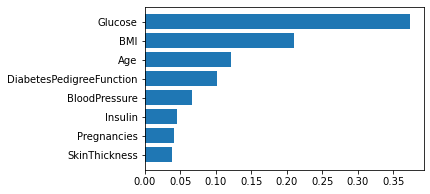

In [24]:
plt.figure(figsize=(5, 3))
plt.barh(importances.feature, importances.importance)